<a href="https://colab.research.google.com/github/KeremAydin98/gan-image-generation/blob/main/DCGAN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Reshape, BatchNormalization,Conv2DTranspose,Conv2D,LeakyReLU,Dropout
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
# reshape and rescaling the data
X_train = X_train / 255

X_train = X_train.reshape(-1,28,28,1) * 2 - 1 # pixels are now between -1 and 1

print(X_train.min())

print(X_train.max())


-1.0
1.0


In [5]:
only_eight = X_train[y_train==8]

In [6]:
only_eight.shape

(5851, 28, 28, 1)

In [7]:
X_train.shape

(60000, 28, 28, 1)

In [8]:
#generator model
coding_size=100
generator = Sequential()

generator.add(Dense(7*7*128,activation='relu',input_shape=[coding_size]))
generator.add(Reshape([7,7,128]))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(64,kernel_size=5,strides=2,padding='same',activation='relu'))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(1,kernel_size=5,strides=2,padding='same',activation='tanh'))


In [9]:
#discriminator model

discriminator = Sequential()

discriminator.add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation=LeakyReLU(0.3),input_shape=[28,28,1]))
discriminator.add(Dropout(0.5))

discriminator.add(Conv2D(128,kernel_size=5,strides=2,padding='same',activation=LeakyReLU(0.3)))
discriminator.add(Dropout(0.5))

discriminator.add(Flatten())

discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(optimizer='adam',loss='binary_crossentropy')

In [10]:
GAN = Sequential([generator,discriminator])

In [11]:
discriminator.trainable = False

In [12]:
GAN.compile(optimizer='adam',loss='binary_crossentropy')

In [13]:
batch_size=16

In [14]:
dataset = tf.data.Dataset.from_tensor_slices(only_eight).shuffle(buffer_size=1000)

In [15]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [16]:
# seperating into batches

dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [17]:
epochs=20

In [18]:
GAN.layers

In [19]:
generator, discriminator = GAN.layers

for epoch in range(epochs):
  print(f"Currently on epoch {epoch+1}")

  i=0 
  for X_batch in dataset:
    i=i+1
    if i%100==0:
      print(f"Currently on batch number {i}")
    
    #DISCRIMINATOR TRAINING PHASE
    noise = tf.random.normal(shape=[batch_size,coding_size])

    gen_images = generator(noise)

    X_fake_vs_real = tf.concat([gen_images,tf.dtypes.cast(X_batch,tf.float32)],axis=0)

    y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)

    #now it is time to train the discriminator
    discriminator.trainable = True
    discriminator.train_on_batch(X_fake_vs_real,y1)

    #GENERATOR TRAINING PHASE
    noise = tf.random.normal(shape=[batch_size,coding_size])
    y2 = tf.constant([[1.0]]*batch_size)

    discriminator.trainable = False #so that we will only train the generator

    GAN.train_on_batch(noise,y2)


Currently on epoch 1
Currently on batch number 100
Currently on batch number 200
Currently on batch number 300
Currently on epoch 2
Currently on batch number 100
Currently on batch number 200
Currently on batch number 300
Currently on epoch 3
Currently on batch number 100
Currently on batch number 200
Currently on batch number 300
Currently on epoch 4
Currently on batch number 100
Currently on batch number 200
Currently on batch number 300
Currently on epoch 5
Currently on batch number 100
Currently on batch number 200
Currently on batch number 300
Currently on epoch 6
Currently on batch number 100
Currently on batch number 200
Currently on batch number 300
Currently on epoch 7
Currently on batch number 100
Currently on batch number 200
Currently on batch number 300
Currently on epoch 8
Currently on batch number 100
Currently on batch number 200
Currently on batch number 300
Currently on epoch 9
Currently on batch number 100
Currently on batch number 200
Currently on batch number 300
C

In [20]:
noise = tf.random.normal([5,coding_size])

noise.shape

TensorShape([5, 100])

In [21]:
fake_images = generator(noise)

In [22]:
fake_images.shape

TensorShape([5, 28, 28, 1])

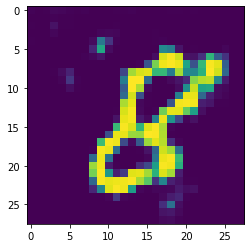

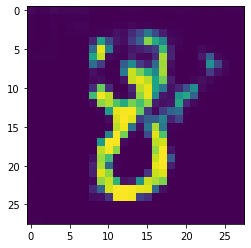

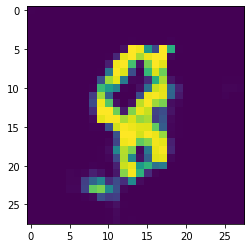

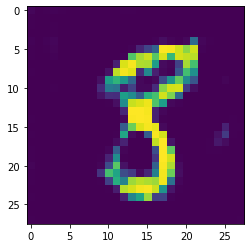

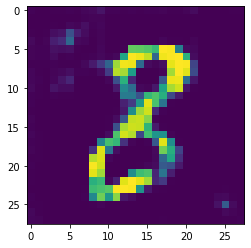

In [23]:
for image in fake_images:
  plt.imshow(image.numpy().reshape(28,28))
  plt.show()